# Introduction

This week, both the theory and laboratory sessions are going to be virtual and asynchronous. It is not needed to do it at the class hours but I strongly recommend that you do so. All you should do is follow the instructions described in this Python Notebook and submit the resulting .ipynb file to the corresponding task in the ATENEA digital Campus https://atenea.upc.edu/ before next **Wednesday, September 28th at 15h**. 

Please keep in mind that the main aim of this session is for you to learn, so if you are stuck or have any questions please don't hesitate contacting me at raul.benitez@upc.edu

#Task 1: Graphical Representation of data

a) Watch the following video decribing how to graphically represent data using Python and google colab:

https://drive.google.com/file/d/1VbtucP6cvsW20xaD8MJg2Exr1ecNAsND/view?usp=sharing

The Python notebook used in the video can be found in the GitHub repository of the course: 

https://github.com/raulbenitez/DAPR/blob/master/Exploratory%20analysis%20pandas.ipynb


b) Load one of the built-in databases from either seaborn or sklearn libraries (except iris, mpg or titanic). You should use the following functions:

https://seaborn.pydata.org/generated/seaborn.load_dataset.html
https://scikit-learn.org/stable/datasets/toy_dataset.html


c) Create 4 different plots using matplotlib and/or seaborn libraries. Add a text cell describing the relevant aspects of the data that can be observed in each graph.





In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
dplanets = sns.load_dataset('planets')
dplanets.head()


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


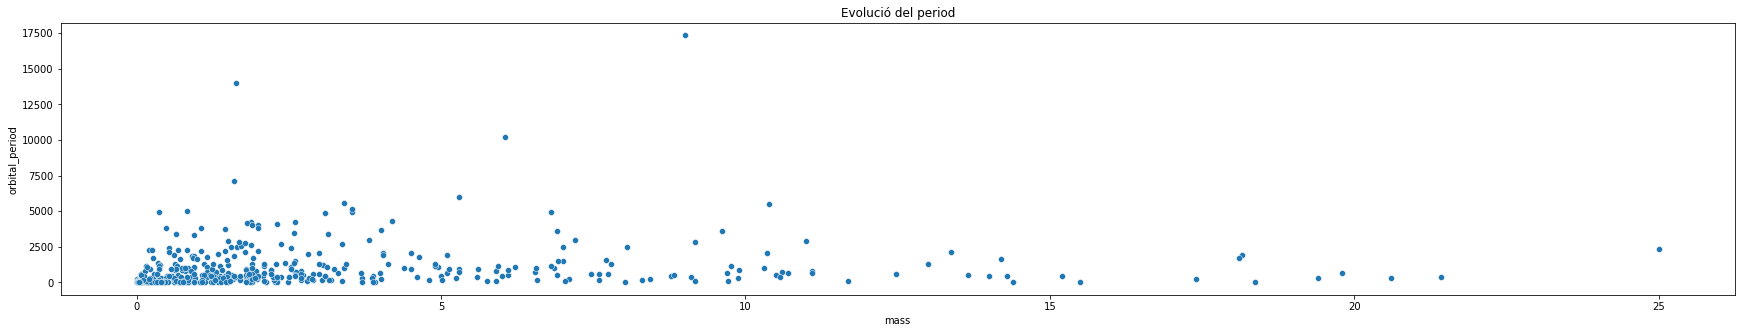

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(30,5))
ax = sns.scatterplot(x="mass", y="orbital_period", data=dplanets)
ax.set_title('Evolucion of the orbital period')
plt.show()
plt.savefig('evolucion.png')


Most of the orbital period are lower than 2500 and the mass are lower than 5

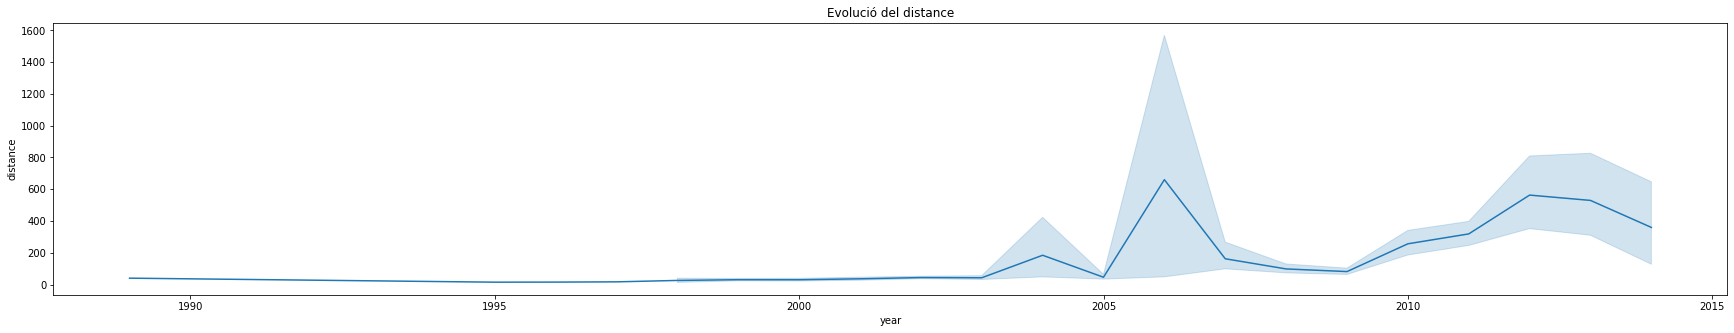

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(30,5))
ax = sns.lineplot(x="year", y="distance", data=dplanets)
ax.set_title('Evolució del distance')
plt.show()
plt.savefig('evolucion.png')


the distance was constant and lower than 100 until 2003  and star rising after it

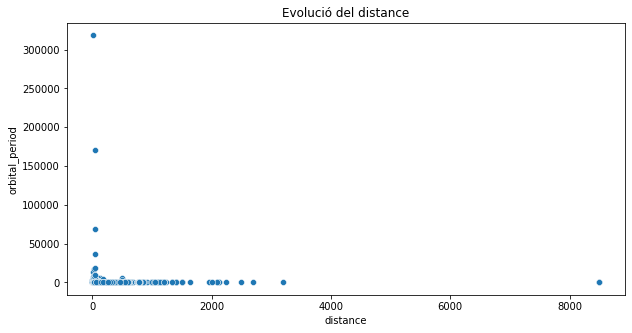

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="distance", y="orbital_period", data=dplanets)
ax.set_title('Evolució del distance')
plt.show()
plt.savefig('evolucion.png')


Most of the orbitals period are lower than 15000 and more the distance is high more the orbital period is low

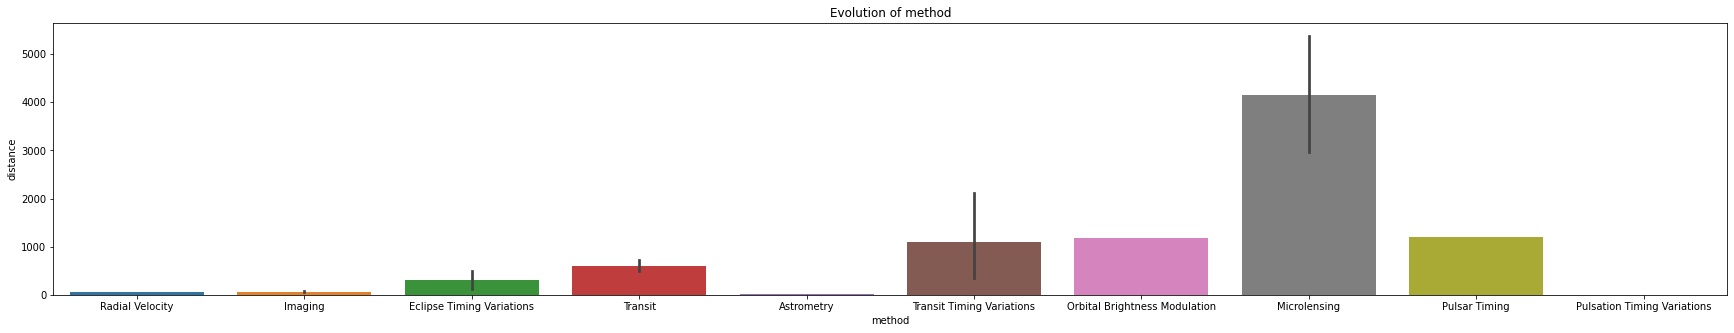

<Figure size 432x288 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(30,5))
ax = sns.barplot(x="method", y="distance", data=dplanets)
ax.set_title('distane')
plt.show()
plt.savefig('evolucion.png')
fig = plt.figure(figsize=(10,6))



Microlensing is used for the higher distance

# Task 2: Dimensionality reduction using Principal Component Analysis 

a) Watch the following video to get an introductory explanation to dimensionality reduction using Principal Component Analysis (PCA)

https://drive.google.com/file/d/1DEjPB8T2y5LT1_1JkixFPGtTeuHXCa6K/view?usp=sharing

b) Watch the following video to get an explanation of how to implement PCA in Python using sklearn libraries. 


https://drive.google.com/file/d/1bLGpxBSlfnGV8x53MnCR8y7xlXmNOqHu/view?usp=sharing

The code used in the video can be found at the course GirHub repository:

https://github.com/raulbenitez/DAPR/blob/master/Dimensionality%20Reduction.ipynb


c) Load one of the built-in databases from the seaborn or sklearn libraries ((except iris, mpg or titanic). The dataset might not necessarily be the same of the one used in Task 1. Keep only the numerical features/variables by either using the pandas drop function (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) or the pandas function df.select_dtypes(include='number') to keep only numeric variables from a dataframe df (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html). 


d) Use the sklearn libraries to apply PCA to reduce the dimensionality of the dataset. Documentation can be found at 

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


Answer the following questions:

  - How many observations and features are there in the dataset? 
  - Represent the multivariate dataset using a multidimensional pairplot https://seaborn.pydata.org/generated/seaborn.pairplot.html
  - What is the variance explained by each PCA component?
  - How many PCA components are needed to explain 95% of the variability in the dataset?
  - Graphically represent the PCA eigenvalues using a barplot 
  - Use a pairplot to represent the dataset after dimensionality reduction 

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

taxis = sns.load_dataset("taxis") 

taxis_num = taxis.select_dtypes(include='number') # keep only numeric variables 
taxis_num_nonans = taxis_num.dropna() # remove observations with NaNs

print('datos originales = {}'.format(taxis.shape))
print('datos numericos = {}'.format(taxis.shape))
print('datos numericos sin NaNs = {}'.format(taxis_num_nonans.shape))

datos originales = (6433, 14)
datos numericos = (6433, 14)
datos numericos sin NaNs = (6433, 6)


In [ ]:
X = taxis_num_nonans

from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X)

In [ ]:
from sklearn import decomposition
n_variables = taxis_num.shape[1]
pca = decomposition.PCA(n_components=n_variables).fit(XS)


In [ ]:
print('pca.explained_variance ={}'.format(100*pca.explained_variance_ratio_.cumsum()))

pca.explained_variance =[ 62.5763893   79.25493952  90.23692671  98.33623702  99.94233026
 100.        ]


In [ ]:
Xproj = pca.transform(XS)

ndim_reducida = 4
XPCA = Xproj[:,0:ndim_reducida]

print('Dimensionalidad datos en espacio PCA reducido = {}'.format(XPCA.shape))


Dimensionalidad datos en espacio PCA reducido = (6433, 4)


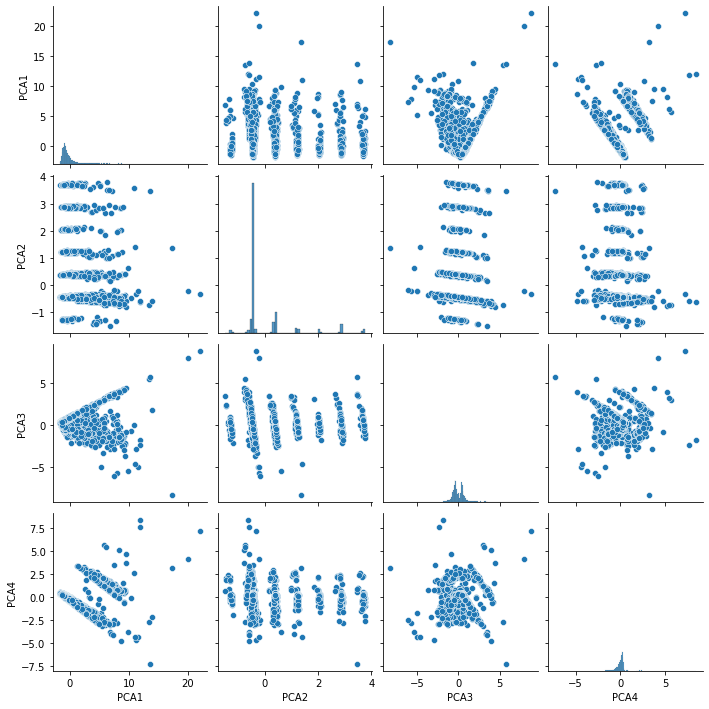

In [ ]:
d = pd.DataFrame(XPCA,columns=['PCA1', 'PCA2','PCA3','PCA4'])
sns.pairplot(d)
plt.show()

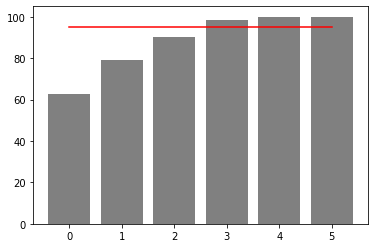

In [ ]:
import numpy as np


height =100*pca.explained_variance_ratio_.cumsum()
bars = ('A', 'B', 'C', 'D', 'E','F')
y_pos = np.arange(len(bars))
A = 95*np.ones((6))
plt.bar(y_pos, height,color='grey')
plt.plot(y_pos, A,color='red',label='95%')


plt.show()

How many observations and features are there in the dataset? : there are


How many PCA components are needed to explain 95% of the variability in the dataset? : 4
